# データの概観

In [1]:
d <- read.csv('data4a.csv')
summary(d)
d

       N           y              x          f     
 Min.   :8   Min.   :0.00   Min.   : 7.660   C:50  
 1st Qu.:8   1st Qu.:3.00   1st Qu.: 9.338   T:50  
 Median :8   Median :6.00   Median : 9.965         
 Mean   :8   Mean   :5.08   Mean   : 9.967         
 3rd Qu.:8   3rd Qu.:8.00   3rd Qu.:10.770         
 Max.   :8   Max.   :8.00   Max.   :12.440         

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generated

,N,y,x,f
1,8,1,9.76,C
2,8,6,10.48,C
3,8,5,10.83,C
4,8,6,10.94,C
5,8,1,9.37,C
6,8,1,8.81,C
7,8,3,9.49,C
8,8,6,11.02,C
9,8,0,7.97,C
10,8,8,11.55,C


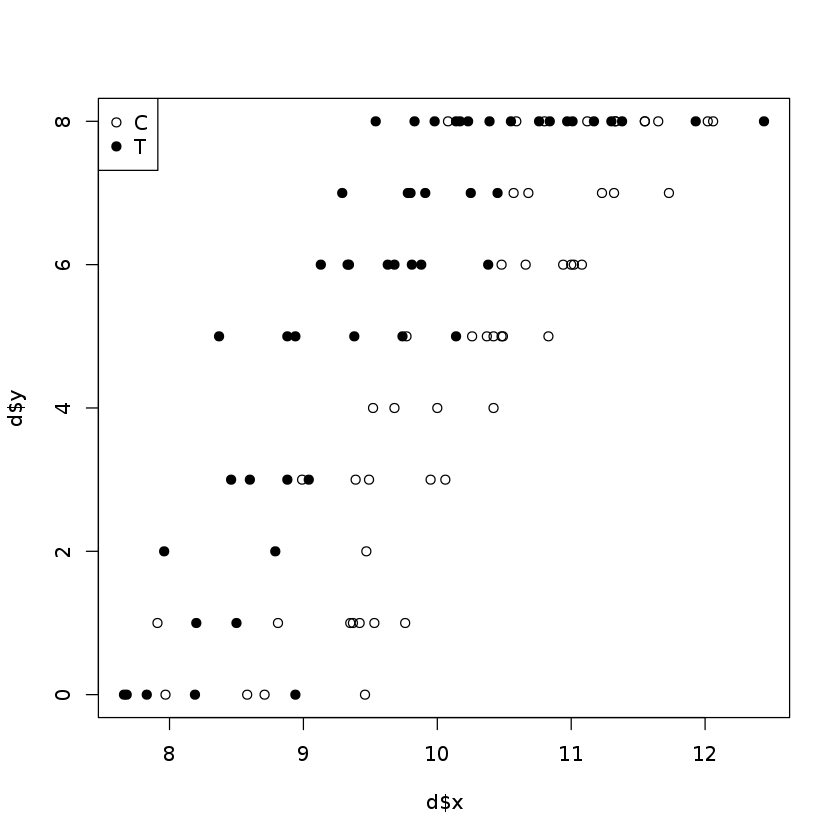

In [2]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
legend("topleft", legend=c("C", "T"), pch=c(21, 19))

# ロジスティック関数の概観

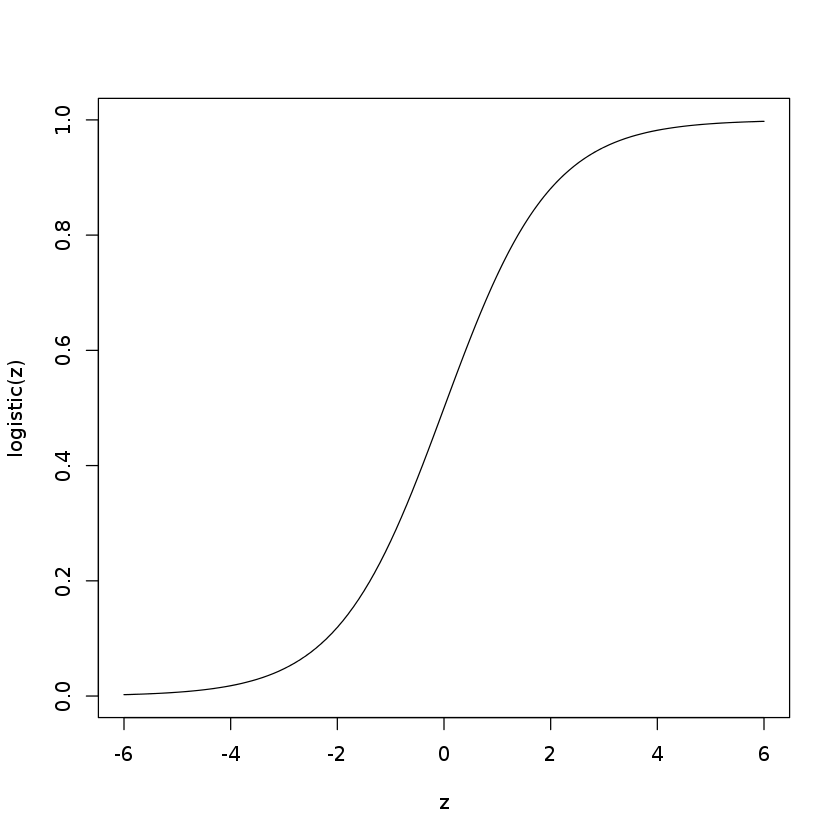

In [3]:
logistic <- function(z) 1 / (1 + exp(-z))
z <- seq(-6, 6, 0.1)
plot(z, logistic(z), type="l")

ロジスティック関数の逆関数がロジット関数。$logit(q_i) = \log\frac{q_i}{1 - q_i}$

In [4]:
fit <- glm(cbind(y, N-y) ~ x + f, data = d, family = binomial)
fit


Call:  glm(formula = cbind(y, N - y) ~ x + f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT  
    -19.536        1.952        2.022  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    499.2 
Residual Deviance: 123 	AIC: 272.2

応答変数が cbind(y, N-y)、family が binomial である点に注意。

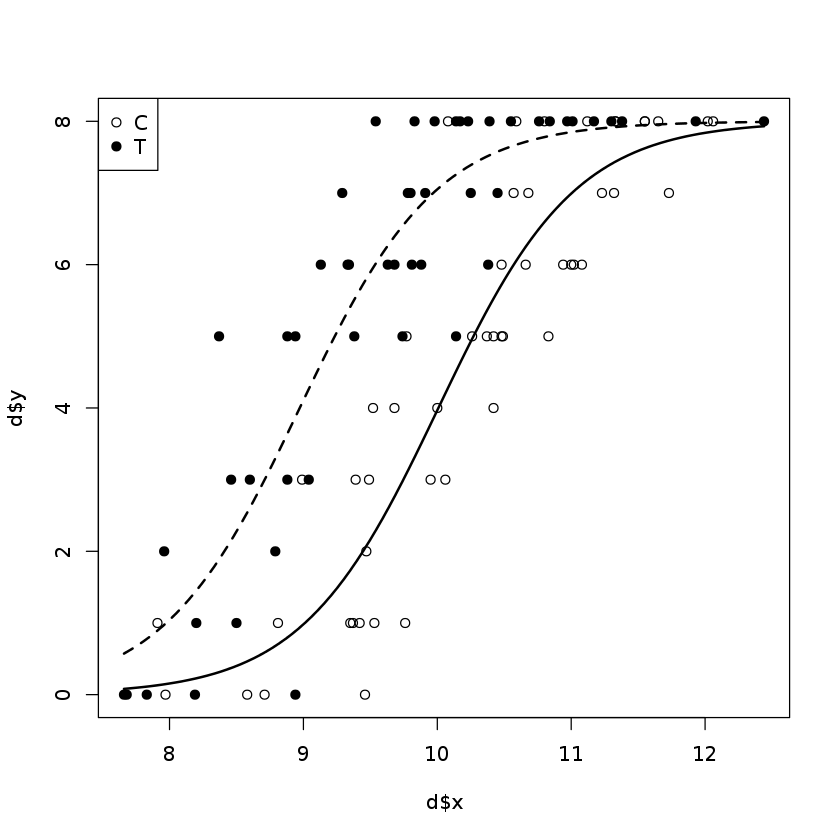

In [5]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
xx <- seq(min(d$x), max(d$x), length=100)
lines(xx, logistic(-19.536 + 1.952 * xx) * d$N, lwd = 2)
lines(xx, logistic(-19.536 + 1.952 * xx + 2.022) * d$N, lwd = 2, lty=2)
legend("topleft", legend=c("C", "T"), pch=c(21, 19))

# AIC によるモデル選択

In [6]:
library(MASS)
stepAIC(fit)

Start:  AIC=272.21
cbind(y, N - y) ~ x + f

       Df Deviance    AIC
<none>      123.03 272.21
- f     1   217.17 364.35
- x     1   490.58 637.76



Call:  glm(formula = cbind(y, N - y) ~ x + f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT  
    -19.536        1.952        2.022  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    499.2 
Residual Deviance: 123 	AIC: 272.2

# 交互作用を考える

In [7]:
fit <- glm(cbind(y, N-y) ~ x + f + x : f, data = d, family = binomial)
fit


Call:  glm(formula = cbind(y, N - y) ~ x + f + x:f, family = binomial, 
    data = d)

Coefficients:
(Intercept)            x           fT         x:fT  
  -18.52332      1.85251     -0.06376      0.21634  

Degrees of Freedom: 99 Total (i.e. Null);  96 Residual
Null Deviance:	    499.2 
Residual Deviance: 122.4 	AIC: 273.6

交互作用によって、fT が大きく変わったように見えるが、実際に式を展開すると、そんなに変わらない。
一応、交互作用も考慮した図を示す。

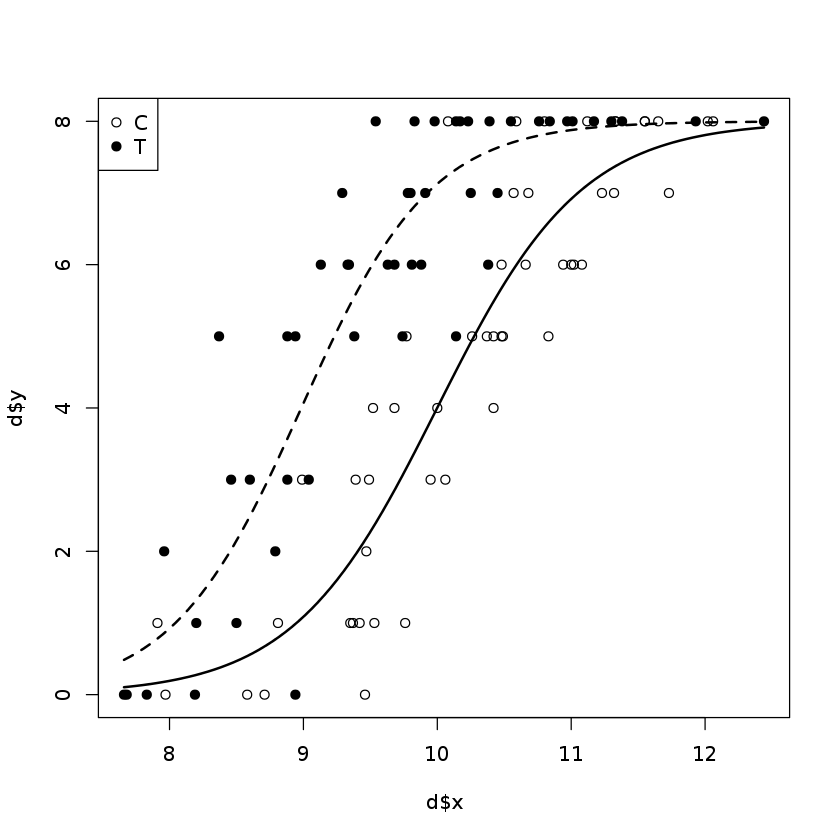

In [8]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
xx <- seq(min(d$x), max(d$x), length=100)
lines(xx, logistic(-18.52332 + 1.85251 * xx) * d$N, lwd = 2)
lines(xx, logistic(-18.52332 + 1.85251 * xx -0.06376 + 0.21634 * xx) * d$N, lwd = 2, lty=2)
legend("topleft", legend=c("C", "T"), pch=c(21, 19))

# オフセット項の導入

In [9]:
d <- read.csv('data4b.csv')
d

,y,x,A
1,57,0.68,10.3
2,64,0.27,15.6
3,49,0.46,10
4,64,0.45,14.9
5,82,0.74,14
6,29,0.15,9.6
7,37,0.5,11.8
8,33,0.57,6.8
9,61,0.79,11.8
10,46,0.57,9.5


In [10]:
glm(y ~ x, offset = log(A), family=poisson, data=d)


Call:  glm(formula = y ~ x, family = poisson, data = d, offset = log(A))

Coefficients:
(Intercept)            x  
     0.9731       1.0383  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    261.5 
Residual Deviance: 81.61 	AIC: 650.3

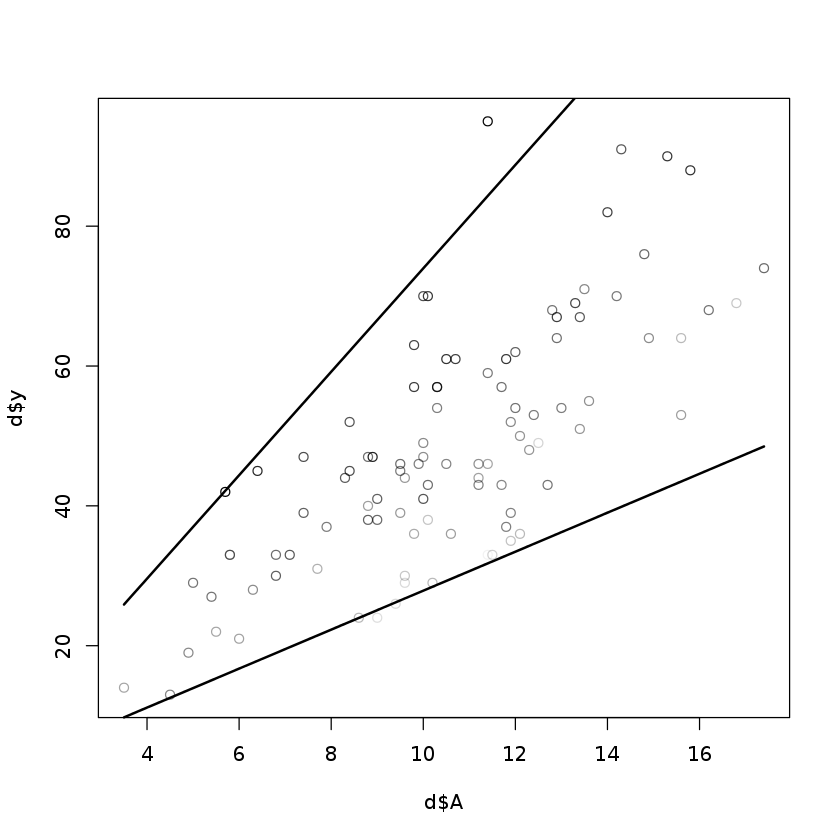

In [14]:
plot(d$A, d$y, col=rgb(0, 0, 0, alpha=d$x))
xx <- seq(min(d$A), max(d$A), length=100)
lines(xx, exp(0.9731 + 1.0383 * min(d$x) + log(xx)), lwd = 2)
lines(xx, exp(0.9731 + 1.0383 * max(d$x) + log(xx)), lwd = 2)

# 正規分布を使ってみる

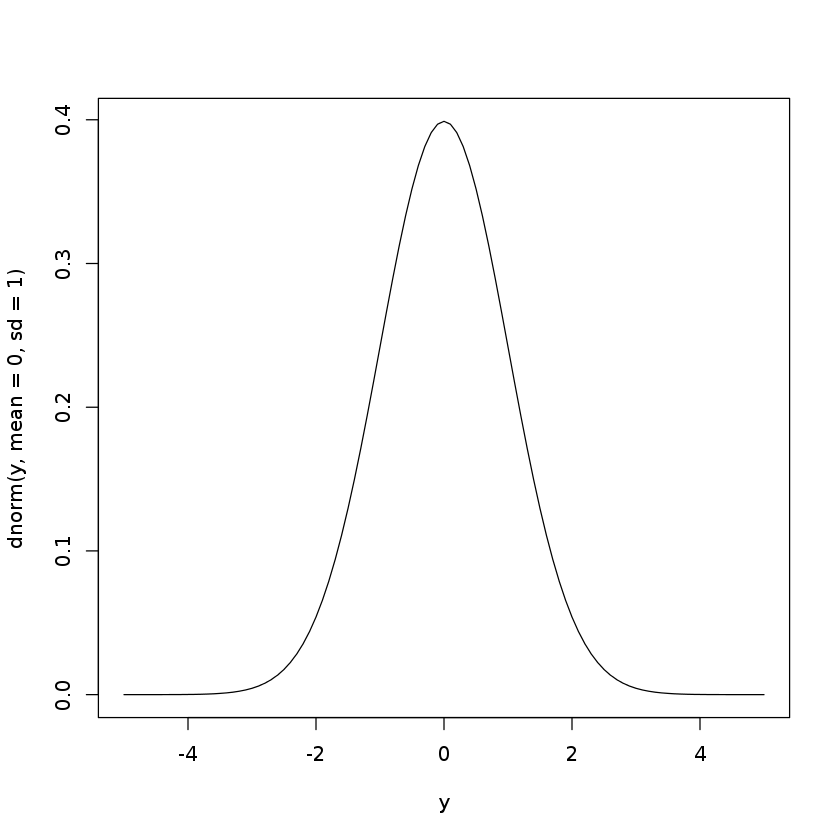

In [15]:
y <- seq(-5, 5, 0.1)
plot(y, dnorm(y, mean = 0, sd = 1), type="l")

平均$\mu=0$, 標準偏差$\sigma=1$の正規分布で、$1.2 \leq y \leq 1.8$ なる確率を計算したい場合は、下記のようにする。

In [16]:
pnorm(1.8, 0, 1) - pnorm(1.2, 0, 1)

[1] 0.07913935

長方形で近似するという手もある。

In [17]:
(1.8 - 1.2) * dnorm(1.5, mean=0, sd=1)

[1] 0.07771056

# ガンマ分布を使ってみる

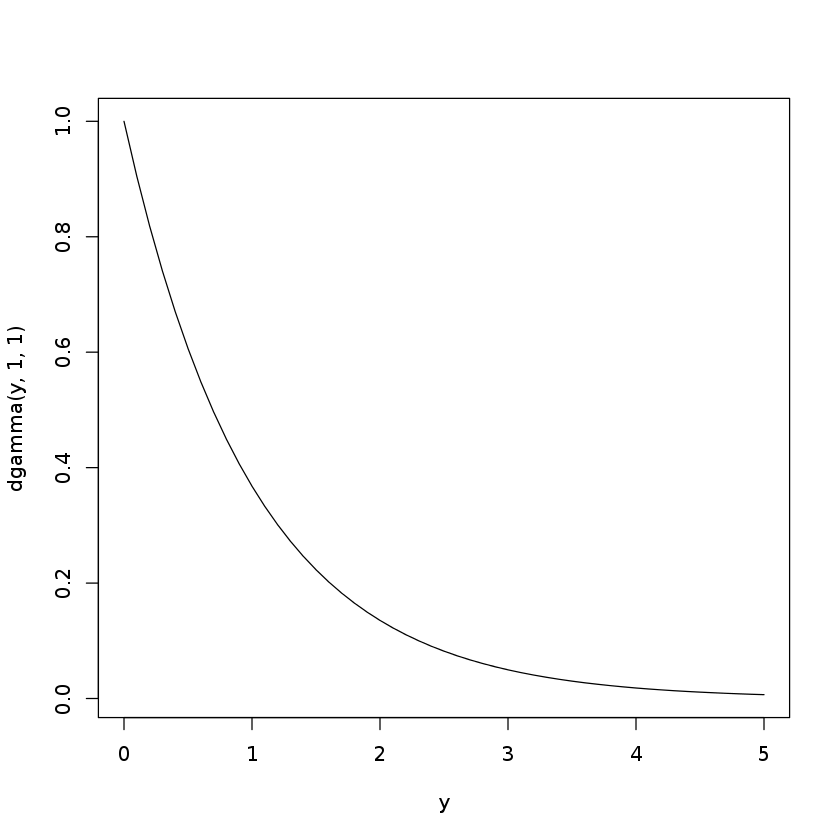

In [20]:
y <- seq(0, 5, 0.1)
plot(y, dgamma(y, 1, 1), type="l")

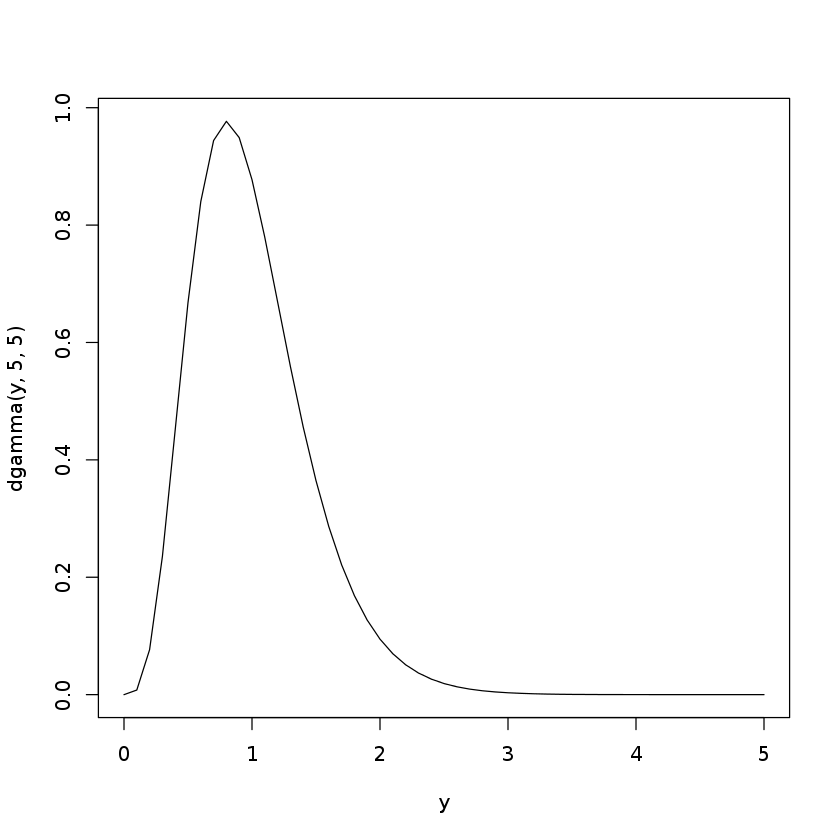

In [21]:
plot(y, dgamma(y, 5, 5), type="l")

In [33]:
d <- read.csv('data4c.csv')
d

,x,y
1,0.001,0.0008873584
2,0.01730612,0.02346521
3,0.03361224,0.06987556
4,0.04991837,0.03434025
5,0.06622449,0.0265204
6,0.08253061,0.1592148
7,0.09883673,0.1650784
8,0.1151429,0.1240029
9,0.131449,0.0596455
10,0.1477551,0.05524527



Call:  glm(formula = y ~ log(x), family = Gamma(link = "log"), data = d)

Coefficients:
(Intercept)       log(x)  
    -1.0403       0.6833  

Degrees of Freedom: 49 Total (i.e. Null);  48 Residual
Null Deviance:	    35.37 
Residual Deviance: 17.25 	AIC: -110.9

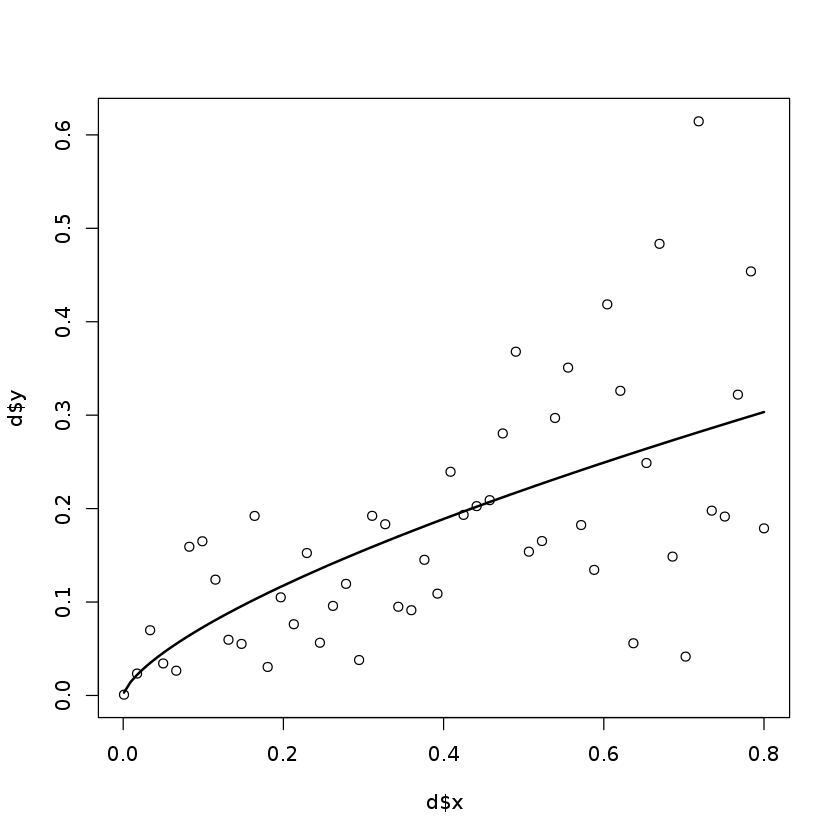

In [43]:
fit <- glm(y ~ log(x), family = Gamma(link = "log"), data = d)
fit
plot(d$x, d$y)
xx <- seq(min(d$x), max(d$x), length=100)
lines(xx, exp(-1.0403 + 0.6833 * log(xx)), lwd = 2)